In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Reading and presenting dataframe**

In [ ]:
url="https://raw.githubusercontent.com/manishbhnau/Repo/master/Credit.csv"
df=pd.read_csv(url)
print (df.head(3))
print (df.columns.tolist())
print (df.shape)

   Unnamed: 0   Income  Limit  Rating  ...  Married  Ethnicity  Balance Defaultee
0           1   14.891   3606     283  ...      Yes  Caucasian      333         0
1           2  106.025   6645     483  ...      Yes      Asian      903         0
2           3  104.593   7075     514  ...       No      Asian      580         0

[3 rows x 13 columns]
['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married', 'Ethnicity', 'Balance', 'Defaultee']
(400, 13)


# **Standardizing features**

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ["Income", "Limit", "Rating", "Balance", "Cards", "Age", "Education"]# Separating out the features
x = df.loc[:, features].values# Separating out the target
y = df.loc[:,['Defaultee']].values# Standardizing the features
x = StandardScaler().fit_transform(x)
print (x.shape, y.shape)
print (x[:4, ::])

(400, 7) (400, 1)
[[-0.86158299 -0.48999879 -0.46553881 -0.40727698 -0.6991298  -1.2576741
  -0.78492991]
 [ 1.72743711  0.82826106  0.82870309  0.83405596  0.03103187  1.5284506
   0.49658831]
 [ 1.68675551  1.01478681  1.02931059  0.13063396  0.76119355  0.88996369
  -0.78492991]
 [ 2.94615212  2.06844038  2.11000258  0.96690036  0.03103187 -1.14158557
  -0.78492991]]


# **Defining PCA and fitting-transforming and obtaingin components**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3' ])
print (principalDf.head(3), principalDf.shape)

        pc1       pc2       pc3
0 -1.190613 -0.362772  1.374834
1  2.159360  0.069087 -1.587466
2  2.015432  1.181892 -0.604167 (400, 3)


# **Adding a targetted column**

In [ ]:
finalDf = pd.concat([principalDf, df[['Defaultee']]], axis = 1)
print (finalDf.head(3), finalDf.shape)

        pc1       pc2       pc3  Defaultee
0 -1.190613 -0.362772  1.374834          0
1  2.159360  0.069087 -1.587466          0
2  2.015432  1.181892 -0.604167          0 (400, 4)


# **Plotting the scatter plot of data on two principal components**

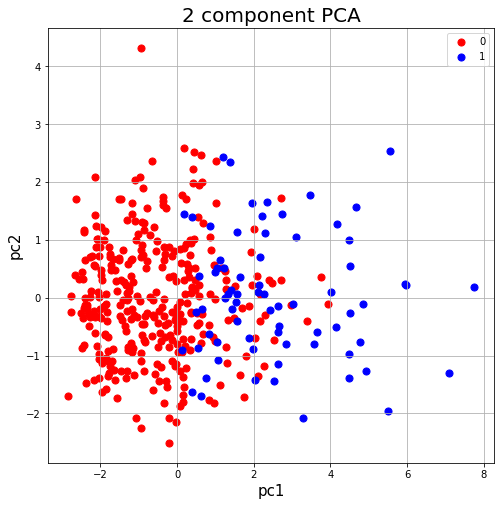

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc1', fontsize = 15)
ax.set_ylabel('pc2', fontsize = 15)
#ax.set_zlabel('pc2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

Defaultee = [0, 1]
colors = ['r', 'b']
for defaultee, color in zip(Defaultee,colors):
    indicesToKeep = finalDf['Defaultee'] == defaultee
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1'], finalDf.loc[indicesToKeep, 'pc2'], c = color, s = 50)
ax.legend(Defaultee)
ax.grid()

# **Regression & Prediction**

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
x_tr, y_tr, x_ts, y_ts=x[:-50], y[:-50], x[-50:], y[-50:]
print (x_tr.shape, y_tr.shape, x_ts.shape, y_ts.shape)

(350, 7) (350, 1) (50, 7) (50, 1)


# **fitting and transforming on train and test data**

In [ ]:
#pca.fit(x_tr)
#x_tr = pca.transform(x_tr)
#x_ts = pca.transform(x_ts)

In [ ]:
logisticRegr.fit(x_tr, y_tr)
logisticRegr.predict(x_ts)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
logisticRegr.score(x_ts, y_ts)

0.94